In [145]:
import numpy as np
import os
import pickle
import re
import matplotlib.pyplot as plt

In [146]:
def get_param_from(filename):
    pattern = r"kF_lambda(?P<kF_lambda>[\d\.\+\-e]+)_q(?P<q>[\d\.]+)_phi_0(?P<phi_0>[\d\.]+)_k_FL(?P<k_FL>[\d\.]+)\.pkl"
    match = re.match(pattern, filename)
    if match:
        kF_lambda = float(match.group('kF_lambda'))
        q = float(match.group('q'))
        phi_0 = float(match.group('phi_0'))
        k_FL = float(match.group('k_FL'))
        return kF_lambda, q, phi_0, k_FL
    else:
        return None

In [147]:
folder_name = "result_FOMP" # 解析する対象のフォルダ

In [148]:
fs = os.listdir(folder_name)
kF_lambda_s = []
vals = []
errs = []
Qs = []
for f in fs: 
    if f.endswith('.pkl'):
        kF_lambda, q, phi_0, k_FL = get_param_from(f)
        if kF_lambda is None:
            continue
        with open(os.path.join(folder_name, f), 'rb') as file:
            result,_ = pickle.load(file)
        kF_lambda_s.append(kF_lambda)
        vals.append(result.mean)
        errs.append(result.sdev)
        Qs.append(result.Q)
sorter = np.argsort(kF_lambda_s)
kF_lambda_s = np.array(kF_lambda_s)[sorter]
vals = np.array(vals)[sorter]
errs = np.array(errs)[sorter]
Qs = np.array(Qs)[sorter]

<ErrorbarContainer object of 3 artists>

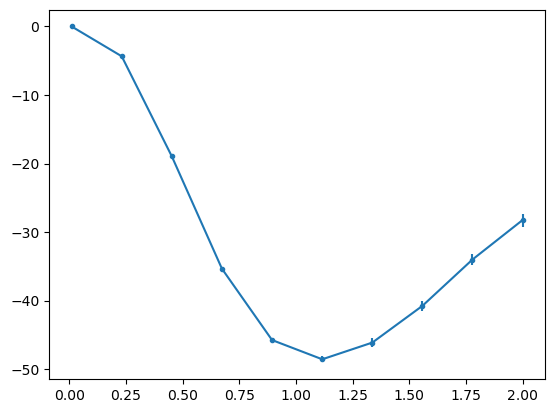

In [149]:
plt.errorbar(kF_lambda_s, vals,errs, marker=".")

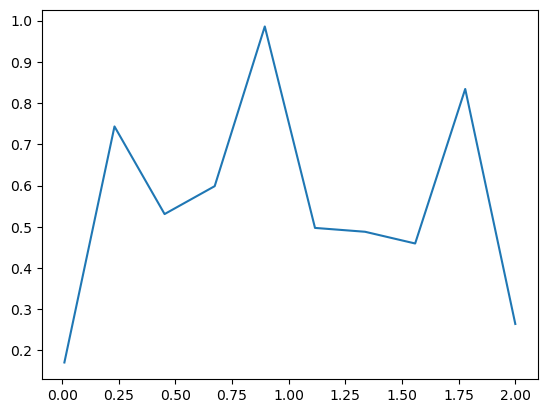

In [150]:
plt.plot(kF_lambda_s, Qs, label='Q')